In [1]:
import pandas as pd
import yfinance as yf
from sklearn.linear_model import LinearRegression 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from sklearn.metrics import r2_score

In [2]:
spy = yf.Ticker("spy")

In [3]:
df = spy.history(period = '480mo')

In [4]:
df = pd.DataFrame(df)

In [5]:
df1 = pd.DataFrame(df['Close'])

In [6]:
df1['Close'] = np.log(df['Close'])
print("skewness is",df1['Close'].skew())
print("kurtois is",df1['Close'].kurtosis())

skewness is 0.11530669219860909
kurtois is -0.5107647210682376


In [7]:
df1['Time'] = range(len(df1))

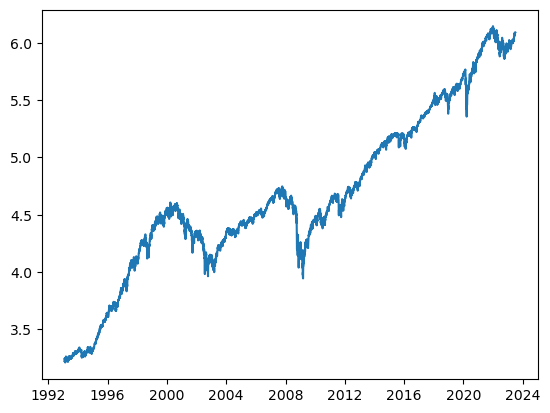

In [8]:
plt.plot(df1['Close'])

In [9]:
X = df1[['Time']]
y = df1['Close']

In [10]:
X = df1[['Time']]  # Independent variable (time trend)
y = df1['Close']   # Dependent variable (log prices)

# Create a LinearRegression model
regression_model = LinearRegression()

# Fit the model to the data
regression_model.fit(X, y)

LinearRegression()

In [11]:
df1['Predicted'] = regression_model.predict(X)

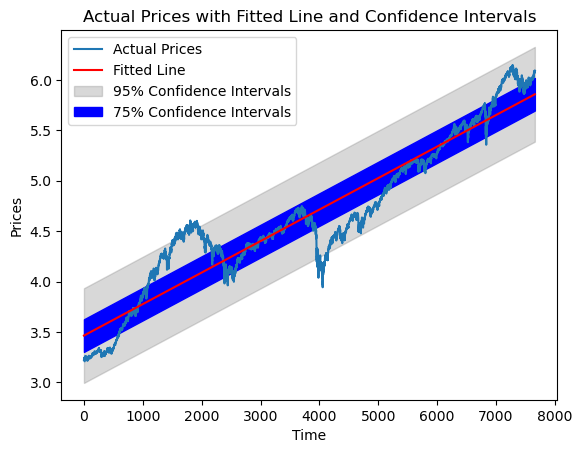

In [12]:
# Create a new figure and axes
fig, ax = plt.subplots()

# Plot the actual prices
ax.plot(df1['Time'], (df1['Close']), label='Actual Prices')

# Plot the fitted line
ax.plot(df1['Time'], (df1['Predicted']), color='red', label='Fitted Line')

# Calculate the confidence intervals
predictions = regression_model.predict(X)
y_hat = (predictions)
std_error = np.sqrt(np.mean(((df1['Close']) - y_hat)**2))
t_value = 1.96  # for a 95% confidence interval with a large sample size
t_value_75 = 0.674
lower = y_hat - t_value * std_error
upper = y_hat + t_value * std_error
upper_75 = y_hat + t_value_75 * std_error
lower_75 = y_hat - t_value_75 * std_error

# Plot the confidence intervals
ax.fill_between(df1['Time'], lower, upper, color='gray',alpha = .3,  label='95% Confidence Intervals')
ax.fill_between(df1['Time'], lower_75,upper_75, color = 'blue', label = '75% Confidence Intervals')

# Set plot title and labels
ax.set_title('Actual Prices with Fitted Line and Confidence Intervals')
ax.set_xlabel('Time')
ax.set_ylabel('Prices')

# Add a legend
ax.legend()

# Show the plot
plt.show()




In [13]:
df1

,Close,Time,Predicted
Date,,,
1993-01-29,3.220051,0,3.463478
1993-02-01,3.227137,1,3.463790
1993-02-02,3.229254,2,3.464103
1993-02-03,3.239769,3,3.464416
1993-02-04,3.243945,4,3.464728
...,...,...,...
2023-06-28,6.078536,7657,5.857371
2023-06-29,6.082470,7658,5.857684
2023-06-30,6.094202,7659,5.857996


In [14]:
df1['Residuals'] = df1['Close'] - df1['Predicted']
df1

,Close,Time,Predicted,Residuals
Date,,,,
1993-01-29,3.220051,0,3.463478,-0.243427
1993-02-01,3.227137,1,3.463790,-0.236654
1993-02-02,3.229254,2,3.464103,-0.234849
1993-02-03,3.239769,3,3.464416,-0.224646
1993-02-04,3.243945,4,3.464728,-0.220784
...,...,...,...,...
2023-06-28,6.078536,7657,5.857371,0.221165
2023-06-29,6.082470,7658,5.857684,0.224786
2023-06-30,6.094202,7659,5.857996,0.236205


In [15]:
rows = df1[df1['Residuals'] < -0.6]
rows

,Close,Time,Predicted,Residuals
Date,,,,
2008-11-20,4.037163,3984,4.709040,-0.671877
2008-11-21,4.089701,3985,4.709353,-0.619652
2009-01-20,4.110904,4023,4.721233,-0.610329
2009-02-17,4.094007,4042,4.727173,-0.633167
2009-02-18,4.091605,4043,4.727486,-0.635880
2009-02-19,4.080792,4044,4.727799,-0.647006
2009-02-20,4.071023,4045,4.728111,-0.657088
2009-02-23,4.034589,4046,4.728424,-0.693835
2009-02-24,4.071798,4047,4.728736,-0.656938


(array([  20.,   97.,  232.,  988.,  973., 2251., 1457.,  665.,  555.,
         424.]),
 array([-0.78864804, -0.65194353, -0.51523902, -0.37853452, -0.24183001,
        -0.1051255 ,  0.03157901,  0.16828351,  0.30498802,  0.44169253,
         0.57839704]),
 <BarContainer object of 10 artists>)

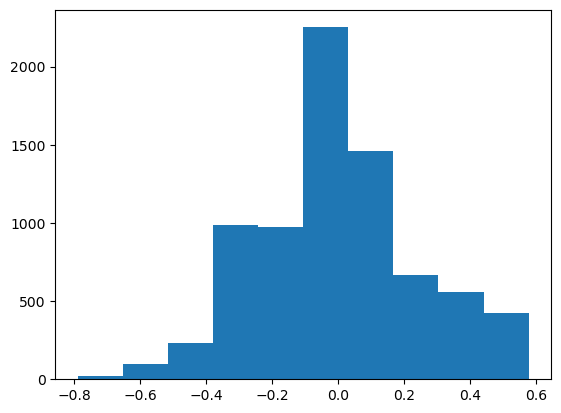

In [16]:
plt.hist(df1['Residuals'])

In [17]:
skewness = df1['Residuals'].skew()
kurtosis = df1['Residuals'].kurtosis()

# Print the results
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Skewness: 0.13849121899203495
Kurtosis: -0.13199334282994402


In [18]:
df1['Residuals'].describe()

count    7.662000e+03
mean     3.540194e-16
std      2.398281e-01
min     -7.886480e-01
25%     -1.577528e-01
50%     -7.030638e-03
75%      1.307131e-01
max      5.783970e-01
Name: Residuals, dtype: float64

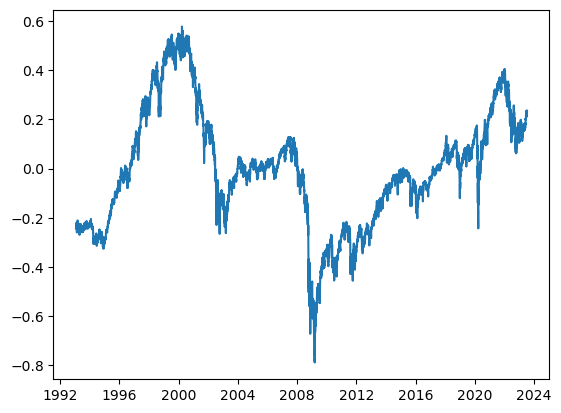

In [19]:
plt.plot(df1['Residuals'])

(array([ 611.,  343.,  350., 1307., 2046.,  561.,  770.,  553.,  466.,
         655.]),
 array([3.20788524, 3.50163609, 3.79538693, 4.08913778, 4.38288862,
        4.67663947, 4.97039031, 5.26414116, 5.557892  , 5.85164284,
        6.14539369]),
 <BarContainer object of 10 artists>)

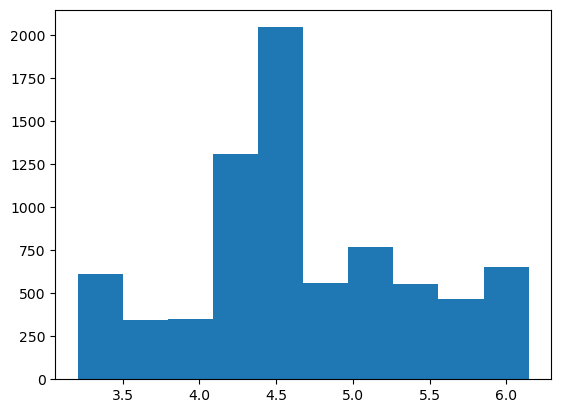

In [20]:
plt.hist(y)

In [21]:
r2_score(df1['Close'],df1['Predicted'])

0.8926440006756424